# Data Preparation

##### *Import Libraries*

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import random
import math
import numpy as np
from tqdm.notebook import tqdm

##### *Global Variables*

In [2]:
# Define the path to the folder containing the images to be processed
folder_path = 'data/original'  # Update this path to point to your specific folder containing images

# Define the path to the folder where the processed images will be saved
output_folder = 'data/processed'  # Update this path to the desired output folder

## Image Preprocessing

### Load Images

In [3]:
def load_images_from_folder(folder_path, extensions=('.png', '.jpg', '.jpeg', '.JPG')):
    """
    Load all image file paths from a specified folder that match the given file extensions.

    Parameters:
    folder_path (str): The path to the folder containing the images.
    extensions (tuple of str): A tuple of file extensions to filter the images by. 
                               Default is ('.png', '.jpg', '.jpeg', '.JPG').

    Returns:
    list: A list of full file paths to images in the folder that match the specified extensions.
    
    Raises:
    FileNotFoundError: If the specified folder does not exist.
    """
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"The specified folder does not exist: {folder_path}")
    
    # List comprehension to gather all image paths with the specified extensions
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(extensions)]
    
    return image_paths


### Convert to Grayscale

In [4]:
def convert_to_grayscale(image):
    """
    Convert an image from BGR color space to grayscale.

    Parameters:
    image (numpy.ndarray): The input image in BGR color space, typically loaded using OpenCV.

    Returns:
    numpy.ndarray: The converted image in grayscale.

    Raises:
    TypeError: If the input is not a valid numpy array.
    """
    
    # Validate the input image type
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a numpy array.")
    
    # Convert the image from BGR to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image


### Enhance Image Quality

In [5]:
def enhance_image_quality(image):
    """
    Enhance the quality of an image by reducing noise and applying a sharpening filter.

    Parameters:
    image (numpy.ndarray): The input image, typically loaded using OpenCV.

    Returns:
    numpy.ndarray: The enhanced image with reduced noise and increased sharpness.

    Raises:
    TypeError: If the input is not a valid numpy array.
    """
    
    # Validate the input image type
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a numpy array.")
    
    # Apply Gaussian Blur to reduce noise
    # GaussianBlur uses a kernel size of 5x5 to smooth the image, which helps in noise reduction.
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Define a sharpening kernel
    # This kernel enhances the edges by amplifying the difference between the central pixel and its neighbors.
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5,-1],
                                  [0, -1, 0]])
    
    # Apply the sharpening filter to the blurred image
    # filter2D applies the sharpening kernel to the image to increase the contrast of edges.
    sharpened_image = cv2.filter2D(blurred_image, -1, sharpening_kernel)

    return sharpened_image


### Apply Threshold

In [6]:
def apply_threshold(image, block_size=15, C=4):
    """
    Apply adaptive thresholding to an image with specified block size and C value.

    Parameters:
    image (numpy.ndarray): The input grayscale image to be thresholded.
    block_size (int): The size of the pixel neighborhood used to calculate the threshold value.
                      Must be an odd number greater than 1. Default is 15.
    C (int): A constant subtracted from the mean or weighted mean. It is used to fine-tune 
             the thresholding. Default is 4.

    Returns:
    numpy.ndarray: The thresholded binary image.

    Raises:
    ValueError: If block_size is not an odd number or if it is less than or equal to 1.
    TypeError: If the input image is not a numpy array.
    """
    
    # Validate the input image type
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a numpy array.")

    # Validate the block_size parameter
    if block_size <= 1 or block_size % 2 == 0:
        raise ValueError("block_size must be an odd number greater than 1.")
    
    # Apply adaptive Gaussian thresholding
    # This method calculates the threshold for a pixel based on the mean of a block_size x block_size 
    # neighborhood of pixels minus the C constant.
    threshold_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, block_size, C)
    
    return threshold_image

### Reduce Noise

In [7]:
def reduce_noise(image, kernel_size=(3, 3)):
    """
    Apply a mild Gaussian blur to reduce noise in the image.

    Parameters:
    image (numpy.ndarray): The input image on which noise reduction will be applied.
    kernel_size (tuple of int): The size of the kernel to be used for Gaussian blur.
                                Default is (3, 3), which provides a mild blur.

    Returns:
    numpy.ndarray: The image with reduced noise.
    
    Raises:
    TypeError: If the input image is not a numpy array.
    """
    
    # Validate the input image type
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a numpy array.")
    
    # Apply Gaussian blur to reduce noise
    reduced_noise_image = cv2.GaussianBlur(image, kernel_size, 0)
    
    return reduced_noise_image

### Save Image

In [8]:
def save_image(image, output_path):
    """
    Save an image to the specified file path.

    Parameters:
    image (numpy.ndarray): The image to be saved, typically a processed image.
    output_path (str): The path, including the file name and extension, where the image will be saved.

    Returns:
    bool: True if the image is successfully saved, False otherwise.

    Raises:
    TypeError: If the input image is not a numpy array or if the output path is not a string.
    """
    
    # Validate the input image type
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a numpy array.")
    
    # Validate the output path type
    if not isinstance(output_path, str):
        raise TypeError("Output path must be a string.")
    
    # Attempt to save the image to the specified path
    success = cv2.imwrite(output_path, image)
    
    # Return whether the save was successful
    return success

### Preview Images

In [9]:
def preview_images(image_paths, num_images=10, title="Image Preview"):
    """
    Display a preview of random images from a list of image paths.

    Parameters:
    image_paths (list of str): A list of file paths to the images that will be previewed.
    num_images (int): The number of images to display in the preview. Default is 10.
    title (str): The title for the preview images. Default is "Image Preview".

    Raises:
    ValueError: If num_images is less than 1 or if image_paths is empty.
    TypeError: If image_paths is not a list or if any element in image_paths is not a string.
    """
    
    # Validate that image_paths is a list of strings
    if not isinstance(image_paths, list) or not all(isinstance(p, str) for p in image_paths):
        raise TypeError("image_paths must be a list of strings.")
    
    # Validate that num_images is a positive integer
    if num_images < 1:
        raise ValueError("num_images must be at least 1.")
    
    # Validate that there are images to preview
    if len(image_paths) == 0:
        raise ValueError("The image_paths list is empty. There are no images to preview.")
    
    # Randomly select images to preview, ensuring no more than the available number of images are selected
    selected_images = random.sample(image_paths, min(len(image_paths), num_images))
    
    # Set up the plot for displaying images
    plt.figure(figsize=(15, 10))
    
    # Loop through the selected images and display each one
    for i, image_path in enumerate(selected_images):
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        if image is None:
            print(f"Warning: Could not read image {image_path}. Skipping.")
            continue
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    
    # Show the plot with the selected images
    plt.show()

### Adaptive Threshold Experiment

In [10]:
def experiment_with_adaptive_threshold(image, block_sizes, C_values):
    """
    Experiment with different block sizes and C values on a single image to determine 
    the best parameters for adaptive thresholding.

    Parameters:
    image (numpy.ndarray): The input image in BGR or grayscale format.
    block_sizes (list of int): A list of block sizes (odd integers) to be tested for adaptive thresholding.
    C_values (list of int): A list of C values to be tested for adaptive thresholding.

    Raises:
    ValueError: If block_sizes and C_values lists are not of the same length, 
                or if block_sizes contains any even numbers or numbers less than or equal to 1.
    TypeError: If image is not a numpy array, or if block_sizes or C_values are not lists of integers.
    """
    
    # Validate the input image type
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a numpy array.")
    
    # Validate that block_sizes and C_values are lists of integers and are of the same length
    if not (isinstance(block_sizes, list) and isinstance(C_values, list)):
        raise TypeError("block_sizes and C_values must be lists of integers.")
    
    if len(block_sizes) != len(C_values):
        raise ValueError("block_sizes and C_values must be of the same length.")
    
    if not all(isinstance(b, int) and b > 1 and b % 2 != 0 for b in block_sizes):
        raise ValueError("All block_sizes must be odd integers greater than 1.")
    
    if not all(isinstance(C, int) for C in C_values):
        raise TypeError("All C values must be integers.")
    
    # Convert the image to grayscale if it is not already
    grayscale_image = convert_to_grayscale(image)
    
    num_values = len(block_sizes)
    cols = 2  # Use 2 columns for displaying the images
    rows = math.ceil(num_values / cols)  # Calculate the number of rows needed

    plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size based on the number of rows
    for i, (block_size, C) in enumerate(zip(block_sizes, C_values)):
        # Apply adaptive thresholding with the current block size and C value
        threshold_image = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                                cv2.THRESH_BINARY, block_size, C)
        plt.subplot(rows, cols, i + 1)  # Position the subplot
        plt.imshow(threshold_image, cmap='gray')  # Display the thresholded image in grayscale
        plt.title(f"blockSize: {block_size}, C: {C}")  # Title indicating the parameters used
        plt.axis('off')  # Hide axis lines and labels
    
    # Display the figure with all subplots
    plt.show()

### Process and Save Images

In [11]:
def process_and_save_all_images(image_paths, output_folder):
    """
    Process all images in the provided list by enhancing their quality, converting them to grayscale,
    applying adaptive thresholding, reducing noise, and saving the results to the specified output folder.

    Parameters:
    image_paths (list of str): A list of file paths to the images that need to be processed.
    output_folder (str): The path to the folder where the processed images will be saved.

    Raises:
    TypeError: If image_paths is not a list of strings or if output_folder is not a string.
    """
    
    # Validate that image_paths is a list of strings
    if not isinstance(image_paths, list) or not all(isinstance(p, str) for p in image_paths):
        raise TypeError("image_paths must be a list of strings.")
    
    # Validate that output_folder is a string
    if not isinstance(output_folder, str):
        raise TypeError("output_folder must be a string.")
    
    # Create the output directory if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Initialize the progress bar for Jupyter notebook
    with tqdm(total=len(image_paths), desc="Processing images", unit="image", ncols=400) as pbar:
        for image_path in image_paths:
            # Read the image from the file path
            image = cv2.imread(image_path)
            if image is None:
                pbar.write(f"Warning: Could not read image {image_path}. Skipping.")
                pbar.update(1)
                continue
            
            # Enhance the quality of the image (e.g., reduce noise and sharpen)
            enhanced_image = enhance_image_quality(image)
            
            # Convert the enhanced image to grayscale
            grayscale_image = convert_to_grayscale(enhanced_image)
            
            # Apply adaptive thresholding to the grayscale image
            threshold_image = apply_threshold(grayscale_image)
            
            # Reduce noise after applying the thresholding
            final_image = reduce_noise(threshold_image)
            
            # Construct the output file path and save the processed image
            filename, file_extension = os.path.splitext(os.path.basename(image_path))
            output_path = os.path.join(output_folder, f"{filename}_Processed{file_extension}")

            save_image(final_image, output_path)
            
            # Update the progress bar with additional information
            pbar.set_postfix({"Saved": output_path})
            pbar.update(1)

## Execution

### Load Images

In [12]:
# Load all image file paths from the specified folder
image_paths = load_images_from_folder(folder_path)

### Preview Random Images

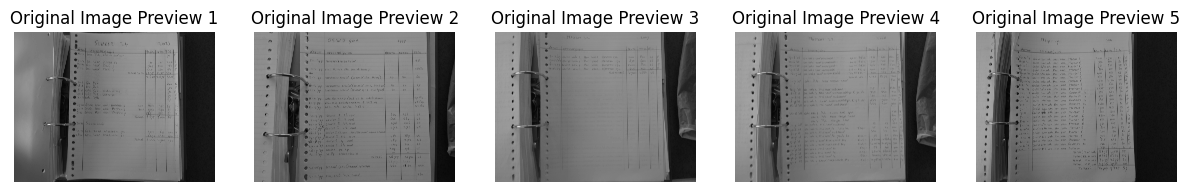

In [13]:
# Preview random images before processing
preview_images(image_paths, num_images=5, title="Original Image Preview")

### Adaptive Thresholding Experiment

In [14]:
block_sizes = [11, 13, 15, 13]  # Different block sizes to test for adaptive thresholding
C_values = [4, 2, 4, 6]  # Different C values to test for adaptive thresholding

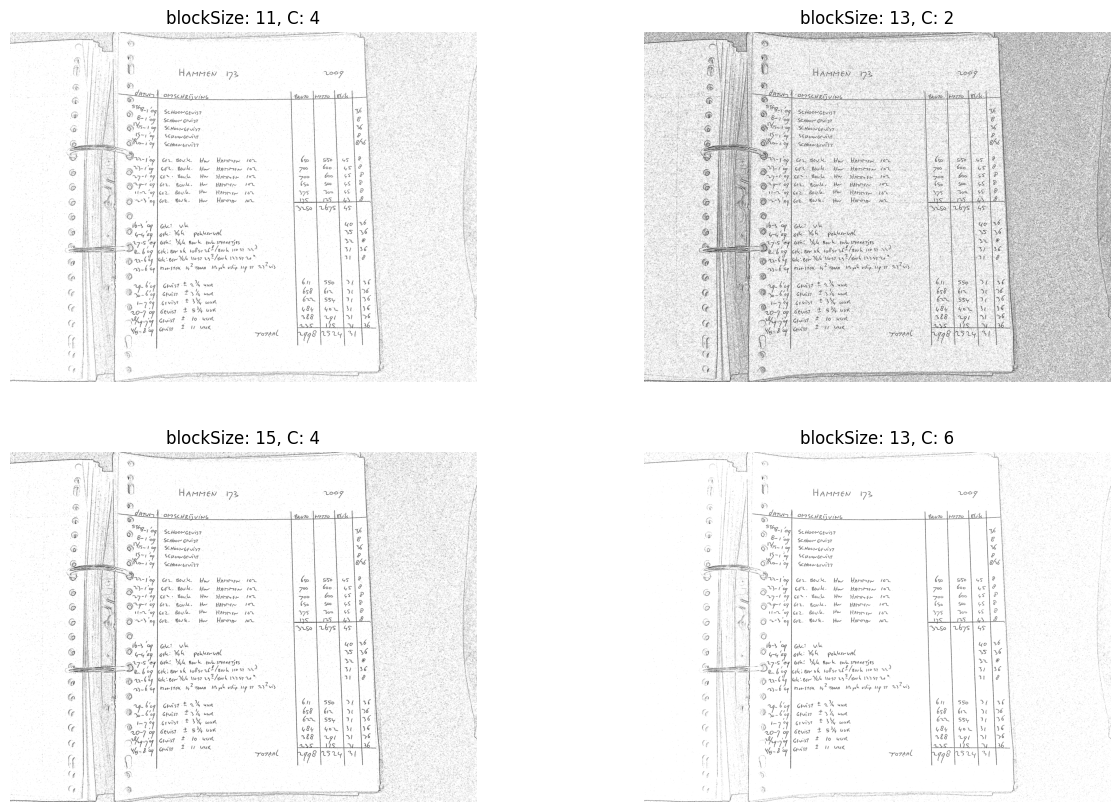

In [15]:
# Select a random image by generating a random index within the list of image paths
image_index = random.randint(0, len(image_paths) - 1)  # Generate a random index
experiment_image = cv2.imread(image_paths[image_index])  # Load the randomly selected image

# Experiment with different block sizes and C values for adaptive thresholding
experiment_with_adaptive_threshold(experiment_image, block_sizes, C_values)

### Processed and Saved Images

In [16]:
# Process all images by enhancing quality and applying threshold
process_and_save_all_images(image_paths, output_folder)

Processing images:   0%|                                                                                      …

### Review Processed Images

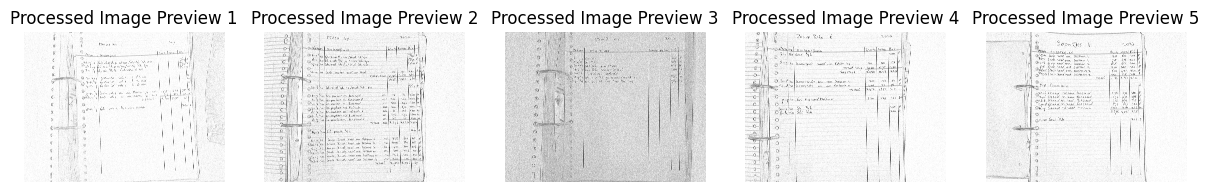

In [17]:
# Preview processed images
processed_image_paths = load_images_from_folder(output_folder)
preview_images(processed_image_paths, num_images=5, title="Processed Image Preview")